In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
col= ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",names = col)

In [3]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
df.tail()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [5]:
df.shape

(205, 26)

In [6]:
df.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

# Cleaning the data

In [7]:
# Removing the columns which are not required or which has string values
# axis = 1 --> column
# axis = 0 --> row

df = df.drop('make', axis = 1)
df = df.drop('fuel_type', axis = 1)
df = df.drop('engine_location', axis = 1)
df = df.drop('num_of_doors', axis = 1)
df = df.drop('body_style', axis = 1)
df = df.drop('drive_wheels', axis = 1)
df = df.drop('engine_type', axis = 1)
df = df.drop('fuel_system', axis = 1)
df = df.drop('aspiration', axis = 1)
df = df.drop('normalized_losses', axis = 1)

In [8]:
df.dtypes

symboling              int64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
num_of_cylinders      object
engine_size            int64
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [9]:
df['num_of_cylinders']

0      four
1      four
2       six
3      four
4      five
       ... 
200    four
201    four
202     six
203     six
204    four
Name: num_of_cylinders, Length: 205, dtype: object

In [10]:
# Converting values in num_of_cylinders to number from string

df['num_of_cylinders'] = df['num_of_cylinders'].replace({'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12})

In [11]:
# Replacing '?' in the dataframe to nan

df = df.replace('?',np.nan)

In [12]:
# Changing the datatype of all the remaining columns which are 'object' type

df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')
df['peak_rpm'] = df['peak_rpm'].astype('float64')
df['price'] = df['price'].astype('float64')

In [13]:
# Filling the missing values with median

df['bore'] = df['bore'].fillna(df['bore'].median())
df['stroke'] = df['stroke'].fillna(df['stroke'].median())
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
df['peak_rpm'] = df['peak_rpm'].fillna(df['peak_rpm'].median())
df['price'] = df['price'].fillna(df['price'].median())

In [14]:
# Checking if there are still any null value left

df.isnull().sum().sum()

0

In [15]:
# Getting the statistics of the dataframe to check for outliers

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
num_of_cylinders,205.0,4.380488,1.080854,2.00,4.00,4.00,4.00,12.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329366,0.270858,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.256098,0.313634,2.07,3.11,3.29,3.41,4.17


# Plotting graph to see the outliers

In [16]:
df.shape

(205, 16)

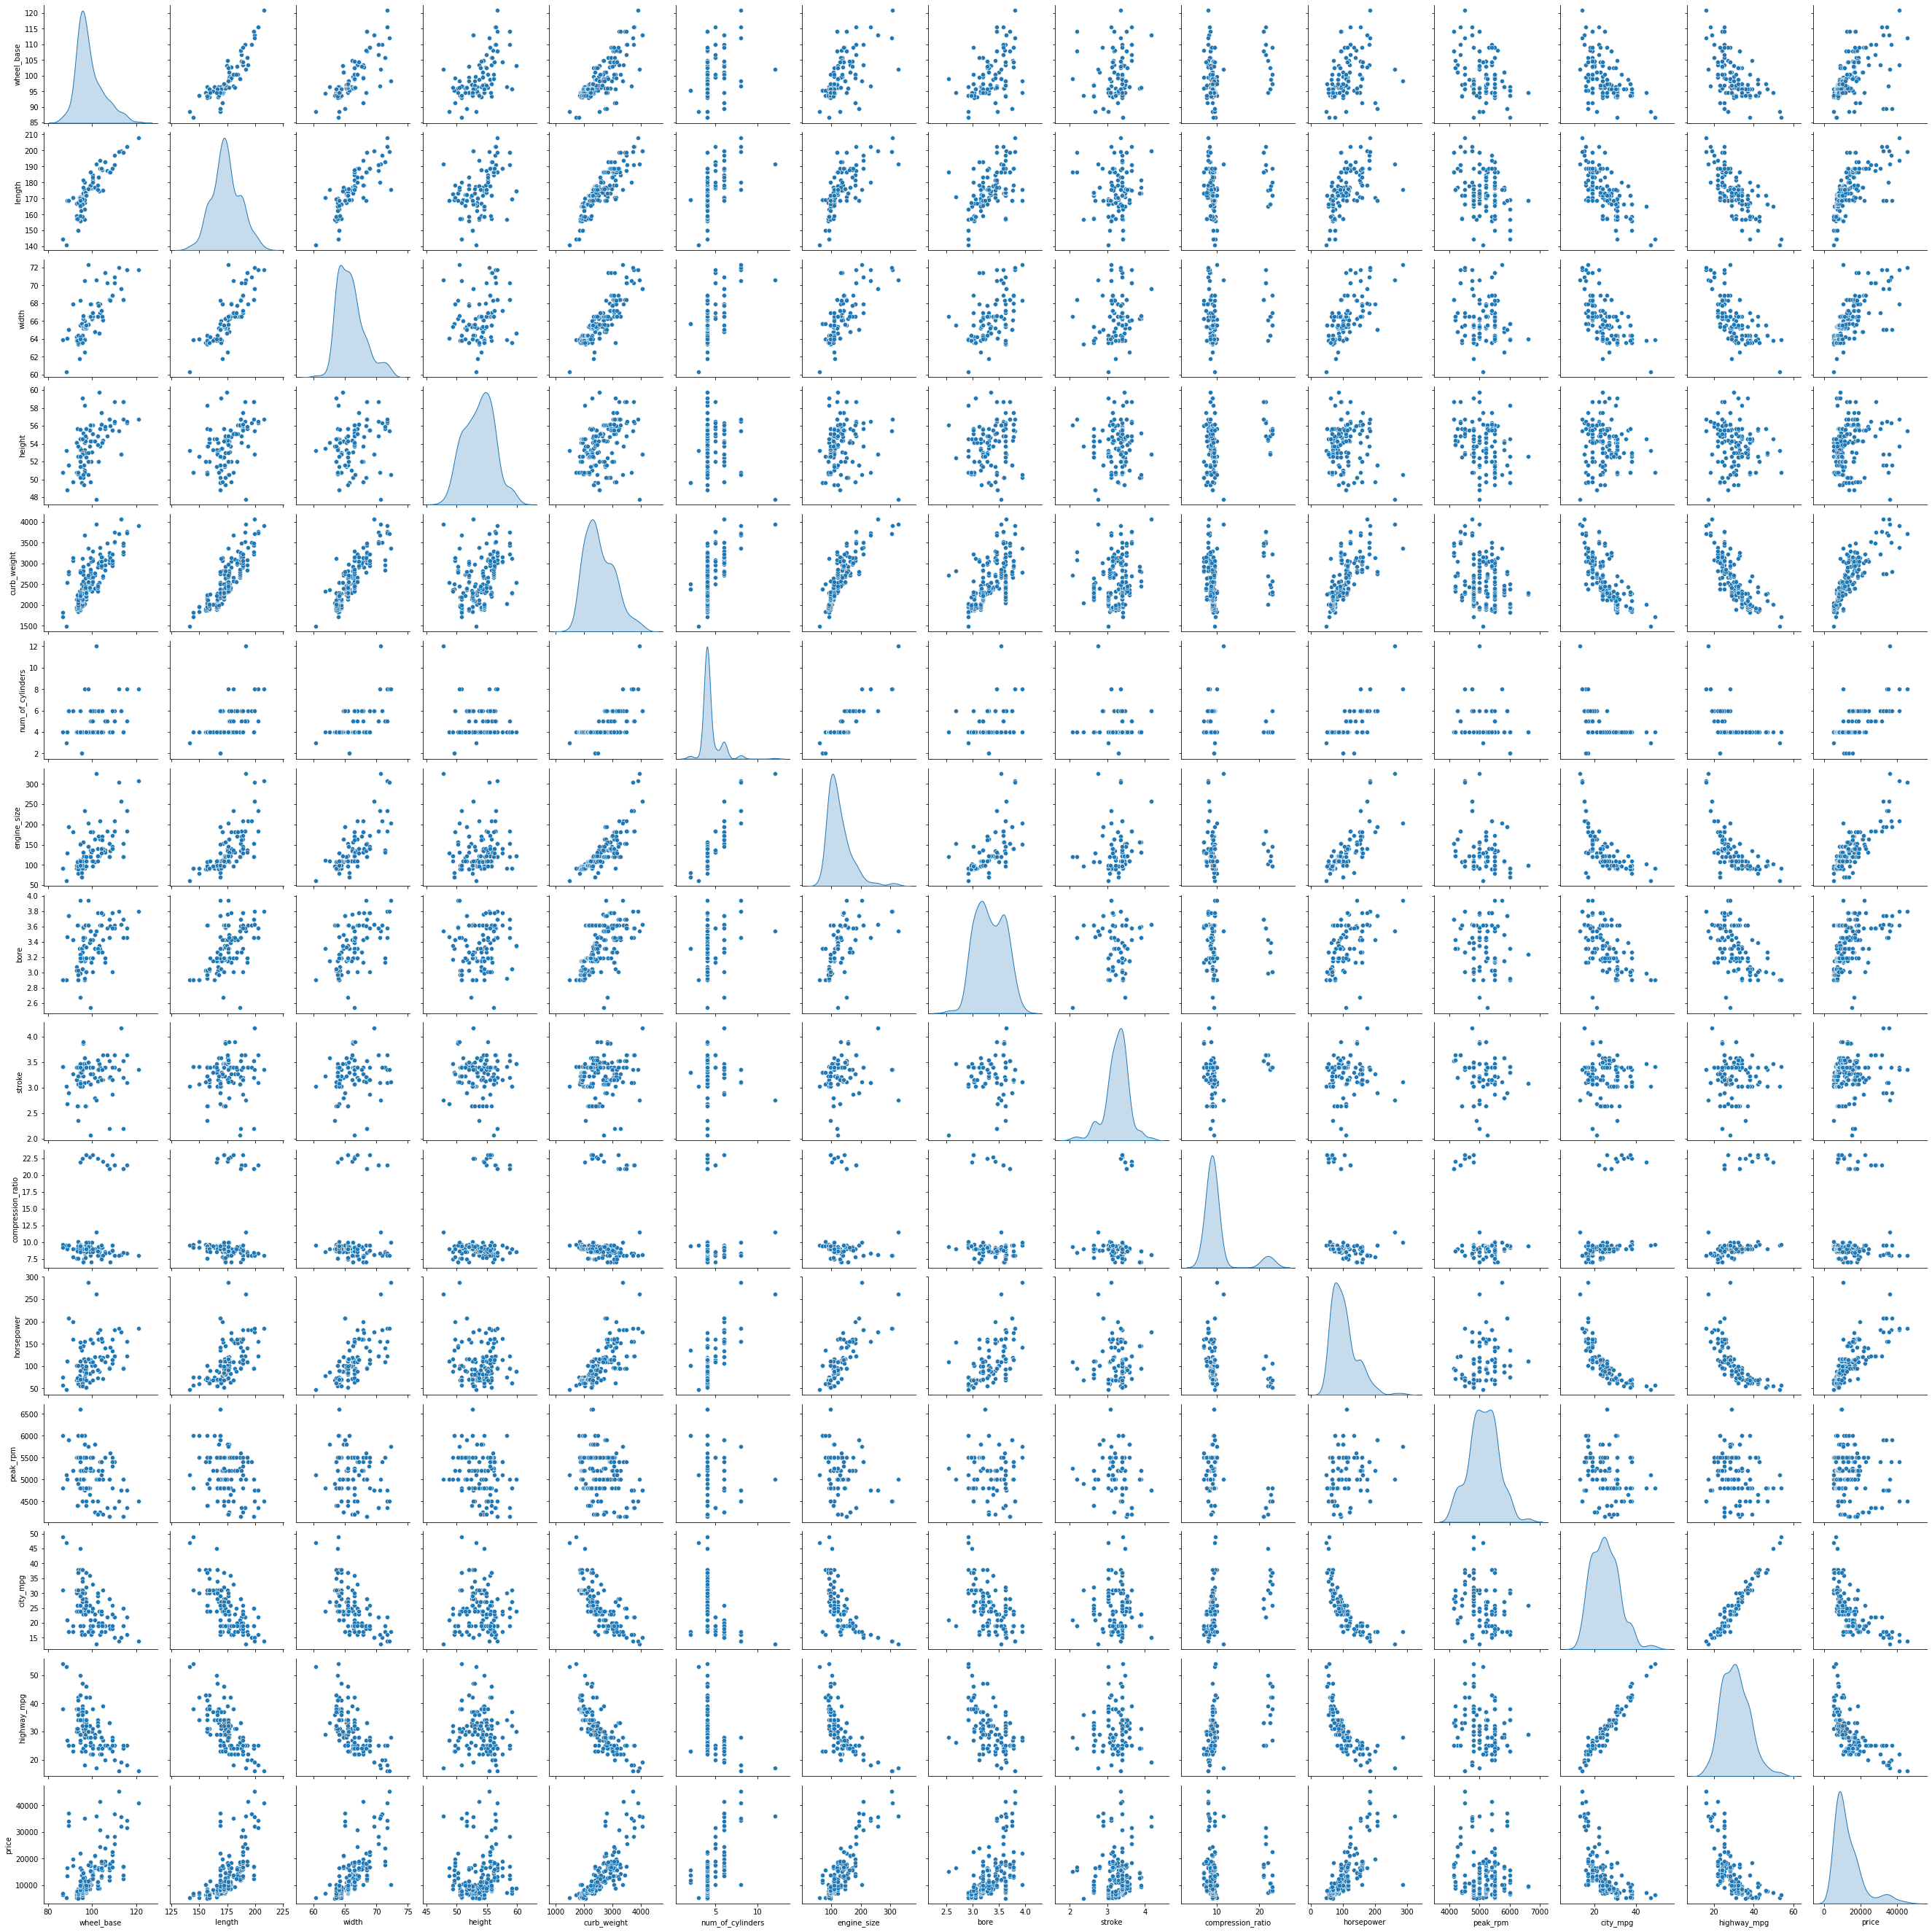

In [17]:
import seaborn as sns
df_graph = df.iloc[:, 1:16]
sns.pairplot(df_graph, diag_kind ='kde')

In [18]:
df.shape

(205, 16)

# Building the model

In [19]:
# x will have all the columns other than 'price'

x = df.drop('price', axis = 1)

In [20]:
# y is the dependent variable having 'price'
# x is the independent variable having all the columns except 'num_of_cylinders' and 'price'

y = df['price']
x = df.drop('num_of_cylinders', axis = 1)

In [21]:
from sklearn.model_selection import train_test_split

In [24]:
# Training and testing the model

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)
rm = LinearRegression()
rm.fit(x_train, y_train)
print ("Accuracy: {}%".format(rm.score(x_test, y_test)*100))

Accuracy: 100.0%
